In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject

In [2]:
using CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [3]:
function reshape2d_4d(img::AbstractArray)
    reshape(img, size(img)[1], size(img)[2], 1, 1)
end

reshape2d_4d (generic function with 1 method)

In [759]:
img_ = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
img_ = reshape2d_4d(img_)
img_ = CuArray(img_)
r_ = similar(img_)

p_ = LaminartGPU.kernels(img_, Parameters.parameters);

LaminartGPU.I_u!(r_, img_, p_)
temp_out = (I = img_, r = r_)
p_ = merge(p_, temp_out);

In [744]:
img = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
p = Laminart.kernels(img, Parameters.parameters);
p = Laminart.add_I_u_p(img, p);



In [745]:

u0 = reshape(rand(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);
x_lgn = reshape(rand(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)
C = reshape(rand(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)
H_z = reshape(rand(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)


f = Laminart.MyFunction(x_lgn, C, H_z)
prob = ODEProblem(f, u0, tspan, p);

In [746]:
tspan = (0.0f0, 100.0f0)
u0_ = CuArray(reshape(u0, p.dim_i, p.dim_j, 5*p.K+2,1));
# u0_ = CuArray(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [747]:
size(x_lgn)

(100, 100, 2)

In [748]:
x_lgn_ = CuArray(reshape(x_lgn[:,:,1], p.dim_i, p.dim_j, 1,1))
# x_lgn = CuArray(reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, 1,1))
C_ = CuArray(reshape(C, p.dim_i, p.dim_j, p.K,1))
H_z_ = CuArray(reshape(H_z, p.dim_i, p.dim_j, p.K,1))


f_ = LaminartGPU.MyFunction(x_lgn_, C_, H_z_)

(::MEngProject.LaminartGPU.MyFunction{CuArray{Float32,4,Nothing}}) (generic function with 1 method)

In [749]:
prob_= ODEProblem(f_, u0_, tspan, p_);

In [762]:
sol_ = solve(prob_)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.001111
   0.011110999
   0.111110985
   1.1111109
  11.11111
 100.0
u: 10-element Array{CuArray{Float32,4,Nothing},1}:
 [0.73609877 0.14918923 … 0.79990876 0.27562273; 0.7850969 0.746585 … 0.43109393 0.46235204; … ; 0.5751742 0.97420096 … 0.48056126 0.67025936; 0.09060061 0.7446331 … 0.39243495 0.31885636]

[0.23119497 0.31363356 … 0.6698767 0.80969965; 0.8525317 0.5813142 … 0.061058283 0.5356996; … ; 0.3367542 0.033370614 … 0.35631478 0.5390316; 0.4776349 0.30611026 … 0.6748941 0.8588126]

[0.9688865 0.20054877 … 0.41464782 0.9203477; 0.3434714 0.18442047 … 0.7767495 0.15293145; … ; 0.6942576 0.9393697 … 0.14677298 0.8219329; 0.20060706 0.7048341 … 0.5343679 0.21296108]

...

[0.57328224 0.08754647 … 0.81602025 0.3790431; 0.9169009 0.32962275 … 0.5879121 0.47588122; … ; 0.5036105 0.040539145 … 0.04892564 0.32624626; 0.44058192 0.2714561

In [761]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 116-element Array{Float32,1}:
   0.0
   0.018726196
   0.051085643
   0.09945914
   0.16420609
   0.2365832
   0.33437523
   0.45030513
   0.5691768
   0.7372864
   0.90912485
   1.114368
   1.3310087
   ⋮
  89.49266
  90.47999
  91.46977
  92.46053
  93.45041
  94.43782
  95.422424
  96.40539
  97.388916
  98.37459
  99.36281
 100.0
u: 116-element Array{Array{Float32,3},1}:
 [0.73609877 0.14918923 … 0.79990876 0.27562273; 0.7850969 0.746585 … 0.43109393 0.46235204; … ; 0.5751742 0.97420096 … 0.48056126 0.67025936; 0.09060061 0.7446331 … 0.39243495 0.31885636]

[0.23119497 0.31363356 … 0.6698767 0.80969965; 0.8525317 0.5813142 … 0.061058283 0.5356996; … ; 0.3367542 0.033370614 … 0.35631478 0.5390316; 0.4776349 0.30611026 … 0.6748941 0.8588126]

[0.9688865 0.20054877 … 0.41464782 0.9203477; 0.3434714 0.18442047 … 0.7767495 0.15293145; … ; 0.6942576 0.9393697 … 0.14677298 0.8219329; 0.20060706 0.7048341 … 0.534

In [763]:
size(sol(100))

(100, 100, 12)

In [764]:
size(sol_(100))

(100, 100, 12, 1)

In [766]:
@test sol(100)[30:70,30:70,:] ≈ Array(sol_(100)[30:70,30:70,:,1])

Test Failed at In[766]:1
  Expression: (sol(100))[30:70, 30:70, :] ≈ Array((sol_(100))[30:70, 30:70, :, 1])
   Evaluated: Float32[1.2534122f-11 2.0776733f-11 … 6.7299764f-12 1.1111905f-11; 7.84278f-12 1.6194832f-11 … 1.5600604f-11 2.1358597f-11; … ; 9.190069f-12 1.39236f-11 … 2.1222227f-11 2.0840055f-11; 2.4291363f-12 2.0677012f-11 … 2.1392162f-11 1.1843055f-11]

Float32[1.6221023f-11 2.1910484f-11 … 8.529135f-12 9.6599135f-12; 2.4129589f-11 9.902555f-12 … 1.8397867f-11 1.6441227f-11; … ; 1.8960266f-11 7.537147f-12 … 5.3720457f-12 9.257149f-12; 7.024388f-12 1.6206564f-11 … 1.1131316f-11 2.2977077f-11]

Float32[-2.3269559f-8 -7.8634f-11 … -4.3122593f-8 -5.032358f-8; -2.5286274f-8 -9.0673097f-10 … -2.2019552f-8 -5.1063285f-8; … ; -1.5515557f-9 -2.0360678f-9 … -8.505388f-8 -7.89566f-9; -4.335757f-9 -3.6860406f-8 … -6.5324355f-9 -4.25627f-8]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 6.0f-45 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[-2.8314395f-12 -2.912781f-12 … -2.3972653f-

Test.FallbackTestSetException: There was an error during testing

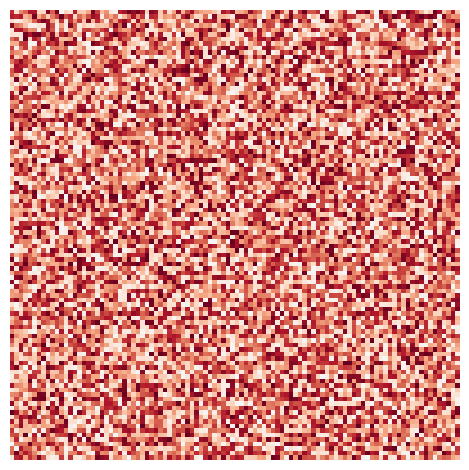

In [767]:
Utils.plot_rb(sol_(100)[:,:,1,1])

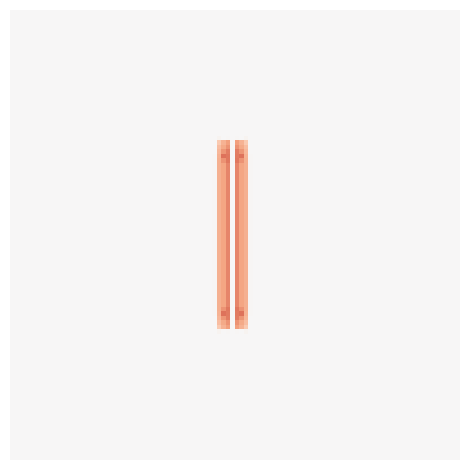

In [768]:
Utils.plot_rb(sol(100)[:,:,1])

In [751]:
u_ = u0_
du_ = u0_
@inbounds begin
        x_ = CuArray(@view u_[:, :, 1:p.K,:])
        y_ = CuArray(@view u_[:, :, p.K+1:2*p.K,:])
        m_ = CuArray(@view u_[:, :, 2*p.K+1:3*p.K,:])
        z_ = CuArray(@view u_[:, :, 3*p.K+1:4*p.K,:])
        s_ = CuArray(@view u_[:, :, 4*p.K+1:5*p.K,:])

        #    C = @view u[:, :, 5*p.K+1:6*p.K]
        #    H_z = @view u[:, :, 6*p.K+1:7*p.K]

        v_p_ = CuArray(@view u_[:, :, 5*p.K+1:5*p.K+1,:])
        v_m_ = CuArray(@view u_[:, :, 5*p.K+2:5*p.K+2,:])
        #    x_lgn = @view u[:, :, 7*p.K+3]

        dx_ = CuArray(@view du_[:, :, 1:p.K,:])
        dy_ = CuArray(@view du_[:, :, p.K+1:2*p.K,:])
        dm_ = CuArray(@view du_[:, :, 2*p.K+1:3*p.K,:])
        dz_ = CuArray(@view du_[:, :, 3*p.K+1:4*p.K,:])
        ds_ = CuArray(@view du_[:, :, 4*p.K+1:5*p.K,:])

        dv_p_ = CuArray(@view du_[:, :, 5*p.K+1:5*p.K+1,:])
        dv_m_ = CuArray(@view du_[:, :, 5*p.K+2:5*p.K+2,:])
    end;

In [752]:
u_[:, :, 5*p.K+1:5*p.K+1,:][:,:,1,1]

100×100 CuArray{Float32,2,Nothing}:
 0.992214    0.699769   0.763456   …  0.653837   0.981489   0.77794
 0.418921    0.333902   0.733252      0.447257   0.942712   0.448978
 0.732718    0.458862   0.504757      0.0668726  0.0805956  0.986776
 0.709932    0.836108   0.111343      0.8073     0.358571   0.844482
 0.145565    0.622642   0.792477      0.121989   0.369839   0.328973
 0.57836     0.99903    0.87854    …  0.913401   0.718138   0.386097
 0.210907    0.226963   0.362262      0.0378047  0.936034   0.349032
 0.831833    0.0819534  0.773417      0.361766   0.285467   0.616819
 0.262755    0.820166   0.800072      0.262111   0.314837   0.996971
 0.531553    0.979257   0.117926      0.610112   0.120584   0.503796
 0.413771    0.561038   0.870723   …  0.828376   0.963192   0.309
 0.644596    0.0422832  0.787045      0.627311   0.98061    0.877759
 0.579743    0.327902   0.971177      0.168627   0.618105   0.655157
 ⋮                                 ⋱                        
 0.552844 

In [753]:
u[:,:,5*p.K+1]

100×100 Array{Float32,2}:
 0.401869   0.796386  0.266062   …  0.643193    0.423612     0.800967
 0.273574   0.119691  0.327081      0.990806    0.70691      0.349295
 0.112734   0.99478   0.0239877     0.326561    0.850371     0.473974
 0.835086   0.534739  0.154017      0.919729    0.619953     0.612336
 0.0455153  0.73143   0.510138      0.254907    0.920187     0.267768
 0.759859   0.484923  0.739959   …  0.510153    0.813267     0.792907
 0.534846   0.254586  0.21116       0.688231    0.95971      0.886948
 0.523632   0.194998  0.998215      0.00672889  0.000892401  0.661806
 0.247742   0.975789  0.313269      0.412954    0.41538      0.557757
 0.241062   0.311766  0.0734067     0.781997    0.938097     0.0591795
 0.309518   0.325678  0.268411   …  0.245829    0.603617     0.905369
 0.297102   0.761574  0.343716      0.201668    0.875531     0.71738
 0.0686306  0.760138  0.122816      0.0139321   0.0392388    0.343882
 ⋮                               ⋱                           
 0

In [754]:
u = u0 
du = u0
@inbounds begin
        x = @view u[:, :, 1:p.K]
        y = @view u[:, :, p.K+1:2*p.K]
        m = @view u[:, :, 2*p.K+1:3*p.K]
        z = @view u[:, :, 3*p.K+1:4*p.K]
        s = @view u[:, :, 4*p.K+1:5*p.K]

        #    C = @view u[:, :, 5*p.K+1:6*p.K]
        #    H_z = @view u[:, :, 6*p.K+1:7*p.K]

        v_p = @view u[:, :, 5*p.K+1]
        v_m = @view u[:, :, 5*p.K+2]
        #    x_lgn = @view u[:, :, 7*p.K+3]

        dx = @view du[:, :, 1:p.K]
        dy = @view du[:, :, p.K+1:2*p.K]
        dm = @view du[:, :, 2*p.K+1:3*p.K]
        dz = @view du[:, :, 3*p.K+1:4*p.K]
        ds = @view du[:, :, 4*p.K+1:5*p.K]

        dv_p = @view du[:, :, 5*p.K+1]
        dv_m = @view du[:, :, 5*p.K+2]

        x_lgn = @view x_lgn[:,:,1];
    end;

In [755]:
@test x ≈ Array(x_)[:,:,:,1]
@test y ≈ Array(y_)[:,:,:,1]
@test m ≈ Array(m_)[:,:,:,1]
@test z ≈ Array(z_)[:,:,:,1]
@test s ≈ Array(s_)[:,:,:,1]
@test v_p ≈ Array(v_p_)[:,:,:,1]
@test v_m ≈ Array(v_m_)[:,:,:,1]
@test dx ≈ Array(dx_)[:,:,:,1]
@test dy ≈ Array(dy_)[:,:,:,1]
@test dm ≈ Array(dm_)[:,:,:,1]
@test dz ≈ Array(dz_)[:,:,:,1]
@test ds ≈ Array(ds_)[:,:,:,1]
@test dv_p ≈ Array(dv_p_)[:,:,:,1]
@test dv_m ≈ Array(dv_m_)[:,:,:,1]
@test C ≈ Array(C_)[:,:,:,1]
@test H_z ≈ Array(H_z_)[:,:,:,1]
@test x_lgn ≈ Array(x_lgn_)[:,:,:,1]

Test Passed

In [27]:
sol = solve(prob);

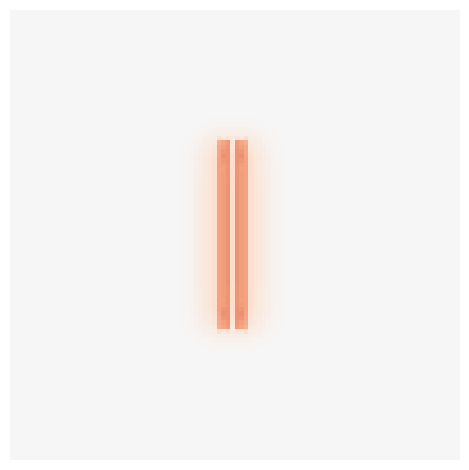

In [13]:
Utils.plot_rb(sol(100)[:,:,7], name="img", save=false)

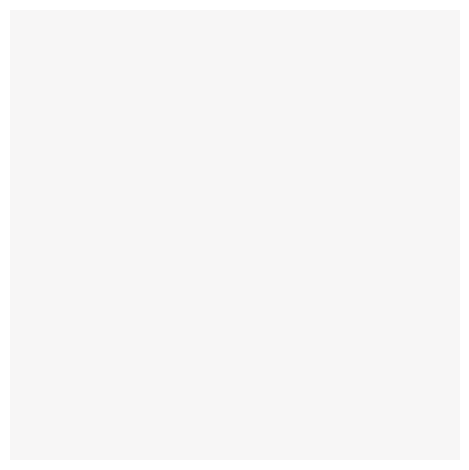

In [18]:
Utils.plot_rb(Array(sol_(100)[:,:,7]), name="img", save=false)

In [19]:
size(sol(100))


(100, 100, 12, 1)

In [20]:
size(sol_(100))

(100, 100, 12, 1)

In [341]:
ii = reshape(ones(Float32, 20000), 100, 100, 2)
ii[:,:,1] .= img
ii[:,:,2] .= relu.(ii[:,:,2] .- (0.8f0 .* img))
# Utils.plot_rb(ii[:,:,2], name="i", save=false)
ii_ = CuArray(reshape(ii, 100,100,2,1));

# Test

In [645]:
r_ = similar(img_)
r = similar(img)
# p_ = LaminartGPU.kernels(img_, Parameters.parameters);
r = Laminart.I_u(img,p)
LaminartGPU.I_u!(r_, img_, p_);

In [646]:
@test r ≈ Array(r_)[:,:,1,1]

Test Passed

In [647]:
@test p.r ≈ Array(p_.r[:,:,1,1])

Test Passed

## x_lgn

In [519]:
out = similar(x_lgn)
out_ = similar(x_lgn_)
out .= 0f0
out_ .= 1f0
Laminart.fun_x_lgn!(out, x, p)
LaminartGPU.fun_x_lgn!(out_, x_, p_)
@test out[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]


Test Passed

In [520]:
out = similar(x_lgn)
out_ = similar(x_lgn_)
out .= 0f0
out_ .= 1f0
Laminart.fun_x_lgn!(out, ii, p)
LaminartGPU.fun_x_lgn!(out_, ii_, p_)
@test out[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]



Test Passed

In [317]:
size(out), size(out_)

((100, 100, 2), (100, 100, 1, 1))

In [ ]:
function fun_x_lgn!(x_lgn::AbstractArray, x::AbstractArray, p::NamedTuple)
    @. x_lgn = 0.0
    # @inbounds begin
        for k ∈ 1:p.K
            @. x_lgn += @view x[:, :, k]
        # end
    end
    return nothing
end

In [363]:
# function fun_x_lgn!(x_lgn::AbstractArray, x::AbstractArray, p::NamedTuple)
    out_ = NNlib.conv(ii_, p_.k_x_lgn, pad=0,flipped=true);
#     return nothing
# end


Laminart.fun_x_lgn!(out, ii, p)

In [364]:
@test out[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]

Test Passed

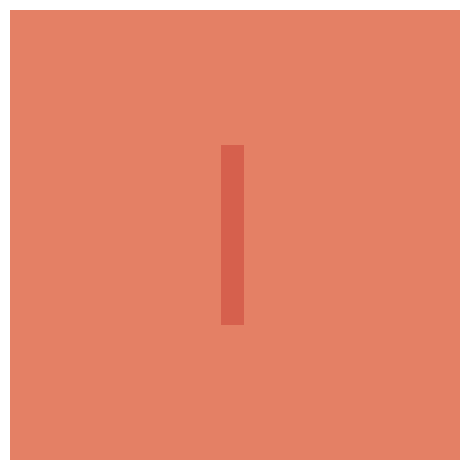

In [357]:
Utils.plot_rb(out_[:,:,1,1], name="", save=false)

In [359]:
outt = out ./ 2

100×100×2 Array{Float32,3}:
[:, :, 1] =
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5

In [360]:
out_

100×100×1×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5

In [361]:
@test outt[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]

Test Passed

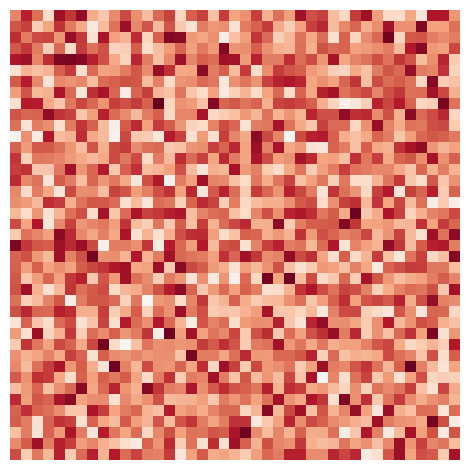

In [319]:
Utils.plot_rb(out_[30:70,30:70,1,1],name="img", save=false)

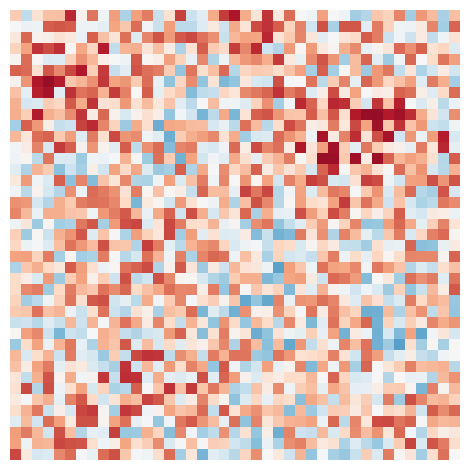

In [321]:
Utils.plot_rb(out[30:70,30:70,1],name="img", save=false, axMax=5)

In [485]:
out = similar(x_lgn)
out_ = similar(x_lgn_)
out .= 0f0
out_ .= 0.3f0
Laminart.fun_x_lgn!(out, ii, p)
LaminartGPU.fun_x_lgn!(out_, ii_, p_)
@test out[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]

Test Passed

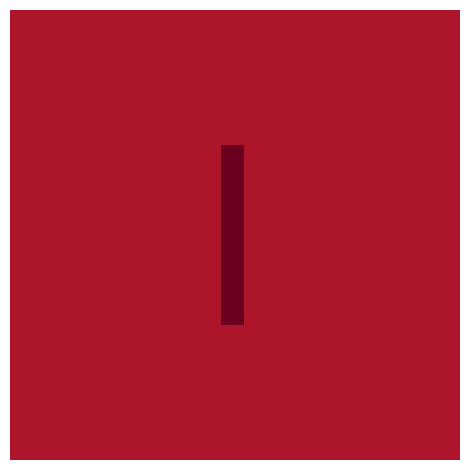

In [486]:
Utils.plot_rb(out_[:,:,1,1], axMax=1.21, name="", save=false)

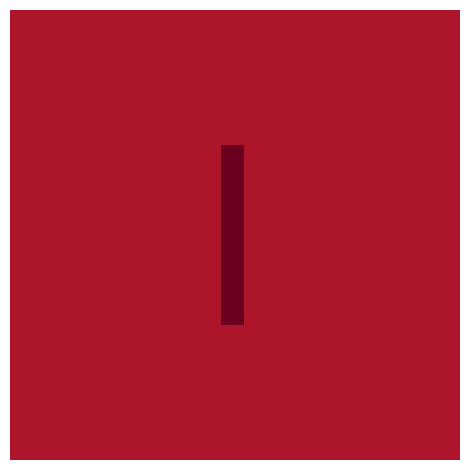

In [487]:
Utils.plot_rb(out[:,:,1], axMax=1.21, name="", save=false)

In [385]:
Utils.plot_rb(out_[:,:,1], name="", save=false)

ArgumentError: ArgumentError: Image has max 1.2,outside range

## C

In [521]:
@test v_p ≈ Array(v_p_)[:,:,1,1]
@test v_m ≈ Array(v_m_)[:,:,1,1]

Test Passed

In [522]:
size(v_p), size(Array(v_p_)[:,:,1,1])

((100, 100), (100, 100))

In [523]:
out = similar(C)
out_ = similar(C_)

out .= 0f0
out_ .= 1f0
Laminart.fun_v_C!(out, v_p, v_m, p)
LaminartGPU.fun_v_C!(out_, v_p_, v_m_, p_)
@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]


Test Passed

## H_z

In [524]:
@test z ≈ Array(z_[:,:,:,1])

Test Passed

In [525]:
out = similar(H_z)
out_ = similar(H_z_)
out .= 0f0
out_ .= 1f0;

In [526]:
Laminart.fun_H_z!(out, z, p)
LaminartGPU.fun_H_z!(out_, z_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

In [475]:
inn = max.(z_ .- p_.Γ, 0f0)
# function fun_H_z!(H_z::AbstractArray, z::AbstractArray, p::NamedTuple)
	LaminartGPU.conv!(out_, inn, p_.k_H, p_)
#     return nothing
# end

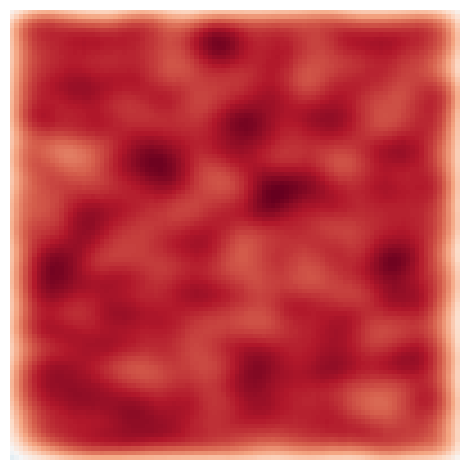

In [476]:
# Utils.plot_rb(out_[:,:,1,1], axMax=9.53)
Utils.plot_rb(out_[:,:,1,1], axMax=1.953)
# Utils.plot_rb(inn[:,:,1,1])

In [471]:
out_ = NNlib.conv(max.(z_ .- p_.Γ, 0f0), p_.k_H, pad=(size(p_.k_H)[1]>>1, size(p_.k_H)[1]>>1, size(p_.k_H)[2]>>1, size(p_.k_H)[2]>>1), flipped=true);


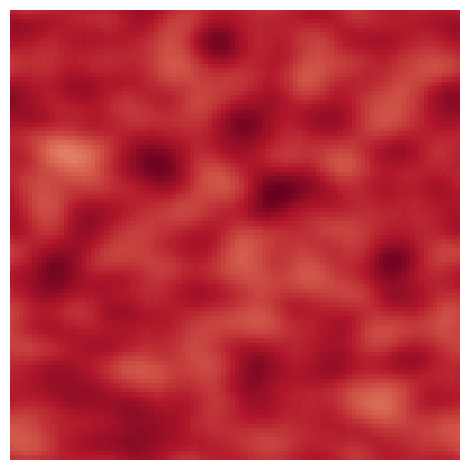

In [442]:
Utils.plot_rb(out[:,:,1], axMax=1.96)

## v_p

In [536]:
@test v_p ≈ Array(v_p_)[:,:,1,1]
@test v_m ≈ Array(v_m_)[:,:,1,1]

@test x_lgn ≈ Array(x_lgn_)[:,:,1,1]

Test Passed

In [607]:
out = similar(dv_p)
out_ = similar(dv_p_)

out .= 0f0
out_ .= 1f0

Laminart.fun_dv!(out, v_p, p.r, x_lgn, p)
LaminartGPU.fun_dv!(out_, v_p_, p_.r, x_lgn_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

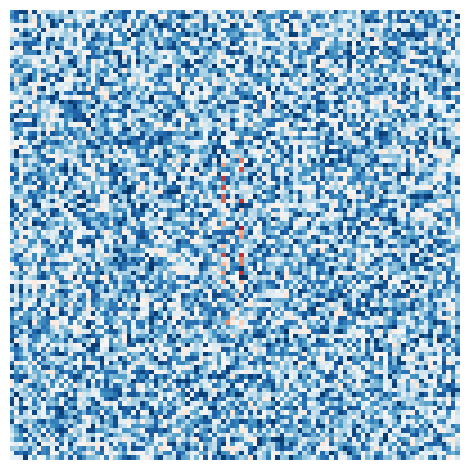

In [613]:
Utils.plot_rb(out, axMin=-1.38)

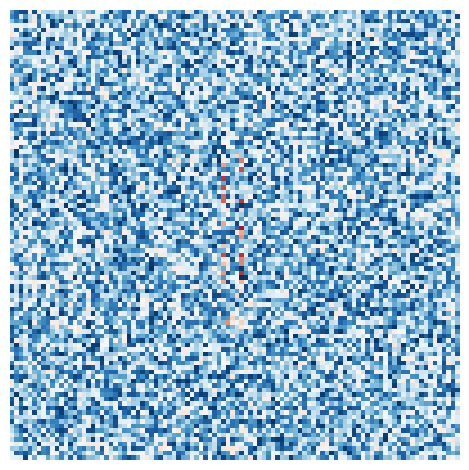

In [612]:
Utils.plot_rb(Array(out_[:,:,1,1]), axMin=-1.38)

In [565]:
out = similar(dv_p)
out_ = similar(dv_p_)

out .= 0f0
out_ .= 1f0;

In [575]:
imfilter!(out, x_lgn, centered(p.k_gauss_1), p.filling)

100×100 Array{Float32,2}:
 0.405066  0.444517  0.47719   0.400656  …  0.533117  0.560705  0.479199
 0.529967  0.477797  0.427253  0.34865      0.58533   0.66194   0.623126
 0.575054  0.505323  0.467734  0.433721     0.562162  0.647053  0.649867
 0.569089  0.536355  0.523747  0.500353     0.554801  0.577515  0.587846
 0.593165  0.564263  0.545398  0.500904     0.535739  0.535047  0.58003
 0.607191  0.56962   0.527666  0.476587  …  0.484457  0.482311  0.568636
 0.589328  0.567239  0.523932  0.482539     0.46841   0.433535  0.524148
 0.530011  0.488755  0.468402  0.482758     0.496409  0.449039  0.500971
 0.492332  0.448869  0.437382  0.493363     0.473381  0.467117  0.486894
 0.480165  0.466584  0.45316   0.49097      0.410818  0.437714  0.46464
 0.442145  0.439957  0.468162  0.478909  …  0.447205  0.446671  0.469556
 0.443526  0.465632  0.529974  0.499655     0.548171  0.517262  0.505214
 0.439591  0.489056  0.545361  0.510599     0.576413  0.526219  0.477172
 ⋮                         

In [574]:
LaminartGPU.conv!(out_, x_lgn_, p_.k_gauss_1, p_)

In [568]:
@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

In [ ]:
# Laminart.fun_dv!(out, v_p, p.r, x_lgn, p)
# LaminartGPU.fun_dv!(out_, v_p_, p_.r, x_lgn_, p_)

In [576]:
    @. out =
        p.δ_v * (
            -v_p + ((1f0 - v_p) * max(p.r, 0f0) * (1f0 + p.C_1 * x_lgn)) -
            ((1f0 + v_p) * p.C_2 * out)
        );

In [577]:
 @. out_ =
        p_.δ_v * (
            -v_p_ + ((1f0 - v_p_) * max(p_.r, 0f0) * (1f0 + p_.C_1 * x_lgn_)) -
            ((1f0 + v_p_) * p_.C_2 * out_)
        )

100×100×1×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 -0.845854   -1.14759   -1.25285    …  -1.15677    -0.571543   -0.160409
 -0.979228   -1.13399   -0.388857      -0.6063     -0.391317   -1.27751
 -0.68751    -0.998599  -0.804026      -1.23192    -0.312983   -0.230832
 -0.297072   -0.277196  -0.104923      -0.419997   -0.225384   -0.98969
 -0.293089   -1.17613   -0.240055      -0.92842    -0.561646   -0.648657
 -0.0436593  -0.249498  -0.859042   …  -0.817495   -0.324137   -0.995469
 -0.561541   -0.489336  -0.591283      -0.0818368  -1.21881    -0.282384
 -0.594009   -1.06994   -0.739293      -0.940894   -1.11715    -0.0811806
 -1.29266    -0.261141  -0.0785591     -0.180053   -1.17169    -0.323358
 -0.137421   -0.39414   -0.206127      -0.70352    -0.199083   -0.617058
 -0.381322   -0.649759  -0.774137   …  -0.266438   -0.249754   -0.388737
 -0.751495   -1.0962    -0.449384      -0.32062    -0.743896   -0.407136
 -1.16332    -0.715462  -0.917653      -0.607467   -0.879249   -0.4764

In [590]:
@test p.δ_v ≈ p_.δ_v
@test -v_p ≈Array(-v_p_)[:,:,:,1]
@test v_p  ≈ Array(v_p_)[:,:,:,1]
@test max.(p.r, 0f0)  ≈ Array(max.(p_.r, 0f0))[:,:,1,1]
# @test p.C_1   ≈ p_.C_1
# @test x_lgn ≈ Array(x_lgn_)[:,:,:,1]
# @test v_p ≈ Array(v_p_)[:,:,:,1]
# @test p.C_2 ≈ p_.C_2
# @test out ≈ Array(out_)[:,:,:,1]

Test Failed at In[590]:4
  Expression: max.(p.r, 0.0f0) ≈ (Array(max.(p_.r, 0.0f0)))[:, :, 1, 1]
   Evaluated: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] ≈ Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]


Test.FallbackTestSetException: There was an error during testing

In [578]:
@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Failed at In[578]:1
  Expression: out[30:70, 30:70, :] ≈ (Array(out_))[30:70, 30:70, :, 1]
   Evaluated: Float32[-0.45983672 -1.0053315 … -0.7144053 -0.7834796; -0.9093899 -1.0817595 … -0.9895691 -0.17239527; … ; -0.4808235 -0.78852063 … -0.18494362 -1.2477185; -1.0311261 -0.61112815 … -0.8768984 -0.465996] ≈ Float32[-0.4598367 -1.0053315 … -0.7144053 -0.7834796; -0.9093899 -1.0817595 … -0.9895691 -0.17239527; … ; -0.48082346 -0.78852063 … -0.1849436 -1.2477183; -1.0311261 -0.61112815 … -0.8768983 -0.465996]


Test.FallbackTestSetException: There was an error during testing

In [588]:
size(p.r)

(100, 100)

In [589]:
size(p_.r)

(100, 100, 1, 1)

In [591]:
max.(p.r, 0f0)

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [593]:
findmax(Array(max.(p_.r, 0f0))[:,:,1,1])

(1.0f0, CartesianIndex(31, 48))

In [594]:
findmax(Array(max.(p.r, 0f0)))

(0.5081643f0, CartesianIndex(31, 48))

In [673]:
@test p.r ≈ Array(p_.r)[:,:,1,1]

Test Passed

## v_m

In [614]:
out = similar(dv_m)
out_ = similar(dv_m_)

out .= 0f0
out_ .= 1f0
Laminart.fun_dv!(out, v_m, -p.r, x_lgn, p)
LaminartGPU.fun_dv!(out_, v_m_, .-p_.r, x_lgn_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

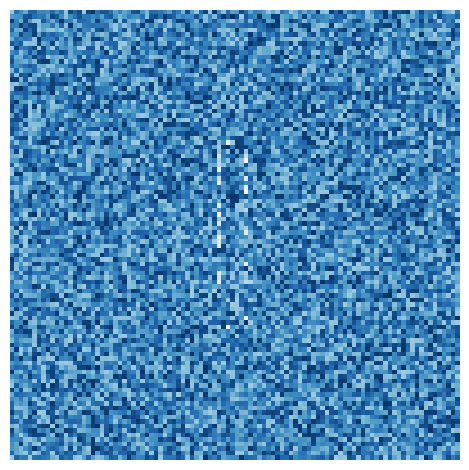

In [615]:
Utils.plot_rb(out, axMin=-1.4, axMax=2.87)

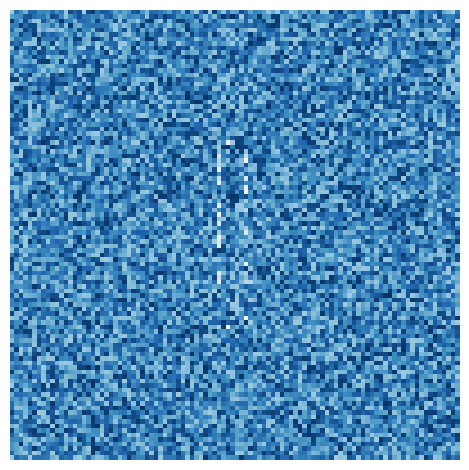

In [616]:
Utils.plot_rb(Array(out_[:,:,1,1]), axMin=-1.4, axMax=2.87)

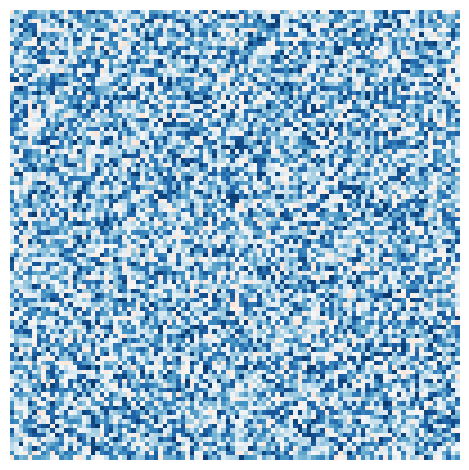

In [542]:
Utils.plot_rb(Array(out_[:,:,1,1]), axMin=-1.4)

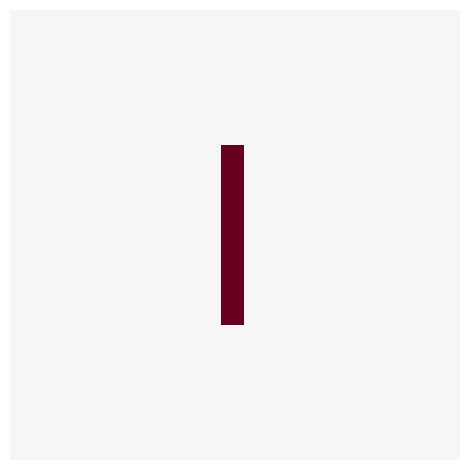

In [598]:
Utils.plot_rb(p_.r[:,:,1,1])

## x

In [529]:
out = similar(dx)
out_ = similar(dx_)
out .= 0f0
out_ .= 1f0

Laminart.fun_dx_v1!(out, x, C, z, p.x_V2, p)
LaminartGPU.fun_dx_v1!(out_, x_, C_, z_, p_.x_V2, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

## y

In [758]:
out = similar(dy)
out_ = similar(dy_)
out .= 0f0
out_ .= 1f0

Laminart.fun_dy!(out, y, C, x, m, p)
LaminartGPU.fun_dy!(out_, y_, C_, x_, m_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

In [621]:
@test y ≈ Array(y_)[:,:,:,1]
@test C ≈ Array(C_)[:,:,:,1]
@test x ≈ Array(x_)[:,:,:,1]
@test m ≈ Array(m_)[:,:,:,1]
# @test ≈ Array()[:,:,:,1]

Test Passed

In [676]:
    Laminart.func_filter_W!(out, m, p.k_W_p, p)
#     @. dy = m * dy
#     Laminart.fun_f!(dy, dy, p)
#     @. dy = p.δ_c * (-y + ((1 - y) * (C + (p.η_p * x))) - ((1 + y) * dy))

In [677]:
 LaminartGPU.conv!(out_, m_, p_.k_W_p, p_)
#     @. dy_ = m_ * dy_
#     LaminartGPU.fun_f!(dy_, dy_, p_)
#     @. dy_ = p_.δ_c * (-y_ + ((1 - y_) * (C_ + (p_.η_p * x_))) - ((1 + y_) * dy_))

In [678]:
@test out[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]

Test Failed at In[678]:1
  Expression: out[30:70, 30:70, 1] ≈ (Array(out_))[30:70, 30:70, 1, 1]
   Evaluated: Float32[39.05825 39.39145 … 37.840164 37.615955; 38.460667 38.662857 … 37.347565 37.34478; … ; 38.37315 38.069675 … 38.17792 38.63056; 39.09218 38.52766 … 38.616188 38.88124] ≈ Float32[39.195312 39.57647 … 37.9389 37.665134; 38.53177 38.859074 … 37.445484 37.431705; … ; 38.515408 38.260857 … 38.12173 38.72861; 39.103405 38.545067 … 38.626244 38.997093]


Test.FallbackTestSetException: There was an error during testing

In [679]:
size(out), size(out_)

((100, 100, 2), (100, 100, 2, 1))

In [680]:
@test m ≈ Array(m)[:,:,:,1]

Test Passed

In [683]:
@test p.k_W_p ≈ Array(p_.k_W_p)

Test Passed

In [682]:
p_.k_W_p

19×19×2×2 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 1.21392f-30  7.11482f-25  8.74082f-20  …  7.11482f-25  1.21392f-30
 3.12145f-30  1.82949f-24  2.2476f-19      1.82949f-24  3.12145f-30
 7.1824f-30   4.20962f-24  5.17168f-19     4.20962f-24  7.1824f-30
 1.47886f-29  8.66763f-24  1.06485f-18     8.66763f-24  1.47886f-29
 2.72477f-29  1.59699f-23  1.96196f-18     1.59699f-23  2.72477f-29
 4.49239f-29  2.63299f-23  3.23473f-18  …  2.63299f-23  4.49239f-29
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 4.15176f-20  2.04049f-16  3.68937f-13     2.04049f-16  4.15176f-20
 9.44935f-19  4.64414f-15  8.39681f-12     4.64414f-15  9.44935f-19
 4.15176f-20  2.04049f-16  3.68937f-13  …  2.04049f-16  4.15176f-20
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 4.49239f-29  2.63299f-23  3.23473f-18     2.63299f-23  4.49239f

In [684]:
p_.k_W_p[:,:,:,1]

19×19×2 CuArray{Float32,3,Nothing}:
[:, :, 1] =
 1.21392f-30  7.11482f-25  8.74082f-20  …  7.11482f-25  1.21392f-30
 3.12145f-30  1.82949f-24  2.2476f-19      1.82949f-24  3.12145f-30
 7.1824f-30   4.20962f-24  5.17168f-19     4.20962f-24  7.1824f-30
 1.47886f-29  8.66763f-24  1.06485f-18     8.66763f-24  1.47886f-29
 2.72477f-29  1.59699f-23  1.96196f-18     1.59699f-23  2.72477f-29
 4.49239f-29  2.63299f-23  3.23473f-18  …  2.63299f-23  4.49239f-29
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 4.15176f-20  2.04049f-16  3.68937f-13     2.04049f-16  4.15176f-20
 9.44935f-19  4.64414f-15  8.39681f-12     4.64414f-15  9.44935f-19
 4.15176f-20  2.04049f-16  3.68937f-13  …  2.04049f-16  4.15176f-20
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 4.49239f-29  2.63299f-23  3.23473f-18     2.63299f-23  4.49239f-29
 

In [685]:
p_.k_W_p[:,:,:,2]

19×19×2 CuArray{Float32,3,Nothing}:
[:, :, 1] =
 0.2  0.2  0.2  0.2       0.2       …  0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2       …  0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.199999  0.199944     0.199944  0.199999  0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2       …  0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.2  0.2  0.2  0.2       0.2          0.2       0.2       0.2  0.2  0.2
 0.

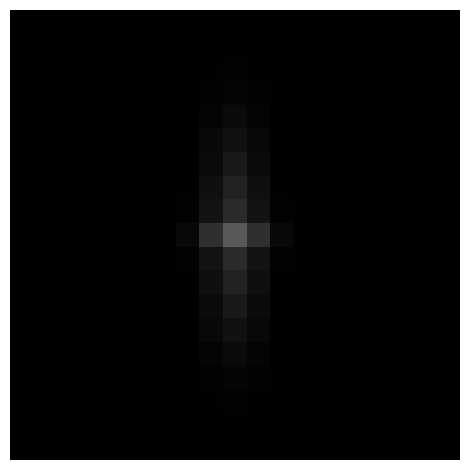

In [686]:
Utils.plot_gs(p.k_W_p[:,:,1,1])

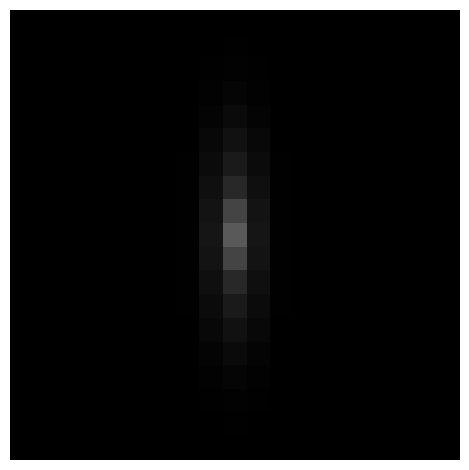

In [692]:
Utils.plot_gs(p.k_W_p[:,:,2,2])

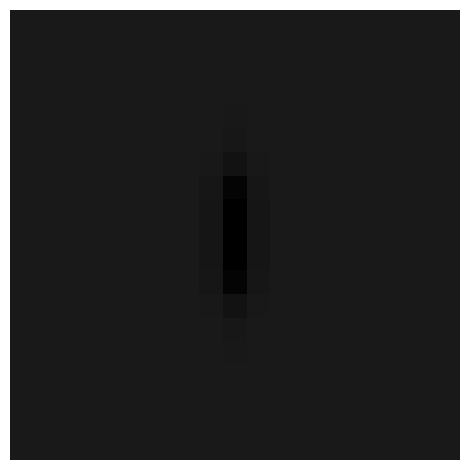

In [689]:
Utils.plot_gs(p.k_W_p[:,:,2,1])

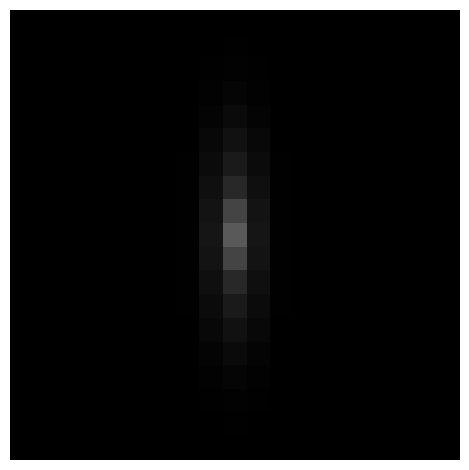

In [688]:
Utils.plot_gs(p.k_W_p[:,:,2,2])

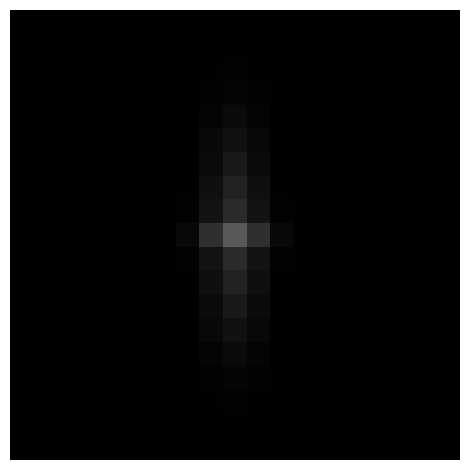

In [739]:
Utils.plot_gs(p_.k_W_p[:,:,1,1])

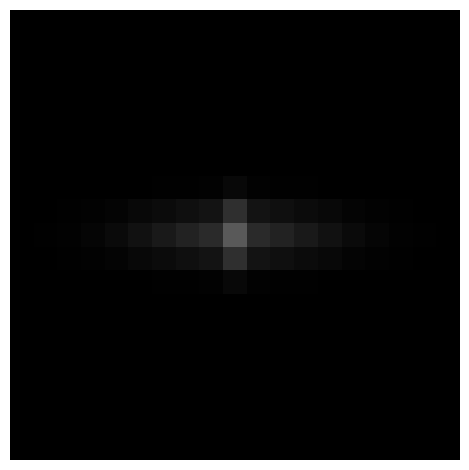

In [740]:
Utils.plot_gs(p_.k_W_p[:,:,2,2])

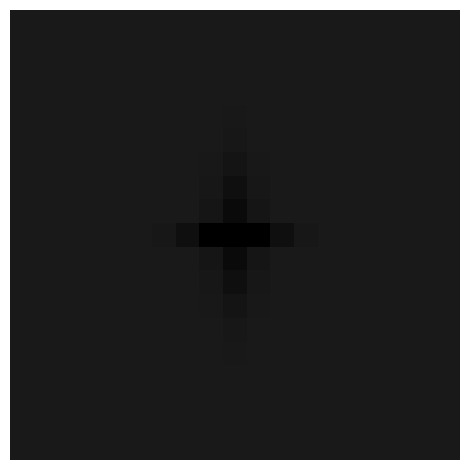

In [742]:
Utils.plot_gs(p.k_W_p[:,:,1,2])

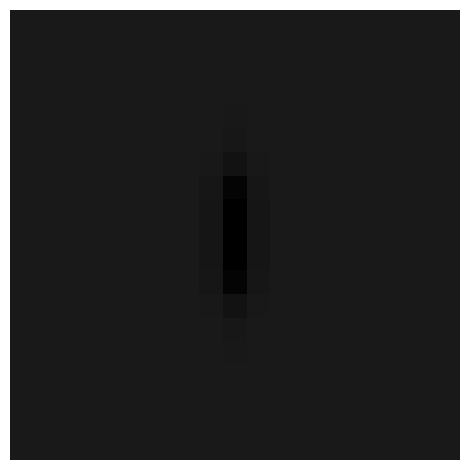

In [741]:
Utils.plot_gs(p.k_W_p[:,:,2,1])

In [691]:
Utils.plot_gs(-p.k_W_p[:,:,2,2]+p.k_W_p[:,:,1,1])

ArgumentError: ArgumentError: Image has min -0.2063115,outside range

## m

In [757]:
out = similar(dm)
out_ = similar(dm_)
out .= 0f0
out_ .= 1f0

Laminart.fun_dm!(out, m, x, p)
LaminartGPU.fun_dm!(out_, m_, x_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

## z

In [756]:
out = similar(dz)
out_ = similar(dz_)
out .= 0f0
out_ .= 1f0

Laminart.fun_dz!(out, z, y, H_z, s, p)
LaminartGPU.fun_dz!(out_, z_, y_, H_z_, s_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

In [713]:
@test z ≈ Array(z_)[:,:,:,1]
@test y ≈ Array(y_)[:,:,:,1]
@test H_z ≈ Array(H_z_)[:,:,:,1]
@test s ≈ Array(s_)[:,:,:,1]
# @test z ≈ Array()[:,:,:,1]
# @test z ≈ Array()[:,:,:,1]

Test Passed

In [728]:
    imfilter!(out, s, centered(p.k_T_p), p.filling);

In [718]:
    LaminartGPU.conv!(out_, s_, p_.k_T_p, p_)
#     @. dz =
#         p.δ_z * (
#             -z + ((1 - z) * ((p.λ * max(y, 0)) + H_z + (p.a_23_ex * p.att))) -
#             ((z + p.ψ) * dz)
#         )

In [721]:

@test out[30:70,30:70,1] ≈ Array(out_)[30:70,30:70,1,1]

Test Passed

In [724]:
@test out[30:70,30:70,2] ≈ Array(out_)[30:70,30:70,2,1]

Test Failed at In[724]:1
  Expression: out[30:70, 30:70, 2] ≈ (Array(out_))[30:70, 30:70, 2, 1]
   Evaluated: Float32[0.73330563 0.7963581 … 0.32409626 0.13935244; 0.99171245 0.19740425 … 0.6010367 0.4422007; … ; 0.6514832 0.82782197 … 0.5943997 0.20347738; 0.7544828 0.53666466 … 0.17519051 0.7425099] ≈ Float32[0.6829396 0.8074738 … 0.34457523 0.5073503; 0.96368253 0.7210796 … 0.39679113 0.62178063; … ; 0.8768897 0.7237328 … 0.63482606 0.2817273; 0.56258136 0.14850761 … 0.2517715 0.22616771]


Test.FallbackTestSetException: There was an error during testing

In [723]:
size(s_), size(p_.k_T_p)

((100, 100, 2, 1), (1, 1, 2, 1))

In [725]:
p_.k_T_p

1×1×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.87

[:, :, 2, 1] =
 0.13

In [727]:
kk = CuArray(reshape(ones(Float32, 4), 1, 1, 2, 2))
kk[:,:,1,1]=0.87
kk[:,:,2,2]=0.87
kk[:,:,1,2]=0.13
kk[:,:,2,1]=0.13;
    

In [729]:
    LaminartGPU.conv!(out_, s_, kk, p_)

## s

In [734]:
out = similar(ds)
out_ = similar(ds_)
out .= 0f0
out_ .= 1f0

Laminart.fun_ds!(out, s, H_z, p)
LaminartGPU.fun_ds!(out_, s_, H_z_, p_)

@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

In [731]:
@test out[30:70,30:70,:] ≈ Array(out_)[30:70,30:70,:,1]

Test Passed

In [291]:

# Utils.plot_rb(t[:,:,1], axMax=1, name="img", save=false)